In this file we have effect of number of clusters on informativeness evaluation (CMAE)
- 1. Performance Comparison
- - Resourceless
- - Resourceful
- 2. Convergence Comparison
- - Resourceless
- - Resourceful
- - All

In [6]:
import os
import json
import matplotlib.pyplot as plt

test_cfeddc_C_02 = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0_100/local_test'
test_cfeddc_C_05 = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C5/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0/local_test'
test_cfeddc_C_10 = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C10/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0/local_test'
test_cfeddc_C_15 = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C15/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0/local_test'

output_dir = './user_plots'  # Folder to save individual plots
os.makedirs(output_dir, exist_ok=True)

# File lists
cfeddc_files_01 = sorted([f for f in os.listdir(test_cfeddc_C_02) if f.endswith('.json')])
cfeddc_files_02 = sorted([f for f in os.listdir(test_cfeddc_C_05) if f.endswith('.json')])
cfeddc_files_03 = sorted([f for f in os.listdir(test_cfeddc_C_10) if f.endswith('.json')])
cfeddc_files_04 = sorted([f for f in os.listdir(test_cfeddc_C_15) if f.endswith('.json')])
# Stats containers
resourceless_cmae_cfeddc_01 = []
resourceful_cmae_cfeddc_01 = []
resourceless_cmae_cfeddc_02 = []
resourceful_cmae_cfeddc_02 = []
resourceless_cmae_cfeddc_03 = []
resourceful_cmae_cfeddc_03 = []
resourceless_cmae_cfeddc_04 = []
resourceful_cmae_cfeddc_04 = []

for file_name in cfeddc_files_01:
    
    cfeddc_path_01 = os.path.join(test_cfeddc_C_02, file_name)
    cfeddc_path_02 = os.path.join(test_cfeddc_C_05, file_name)
    cfeddc_path_03 = os.path.join(test_cfeddc_C_10, file_name)
    cfeddc_path_04 = os.path.join(test_cfeddc_C_15, file_name)       

    try:
        with open(cfeddc_path_01, 'r') as f1, open(cfeddc_path_02, 'r') as f2, open(cfeddc_path_03, 'r') as f3, open(cfeddc_path_04, 'r') as f4:
            data_cfeddc_01 = json.load(f1)
            data_cfeddc_02 = json.load(f2)
            data_cfeddc_03 = json.load(f3)
            data_cfeddc_04 = json.load(f4)
            
            

            user_id = data_cfeddc_01.get("user_id", file_name.split("_")[1])
            resource_category = data_cfeddc_01.get("resource_category", "Unknown")

            cmae_cfeddc_01 = data_cfeddc_01.get("validation_results", {}).get("info_cmae", [])
            cmae_cfeddc_02 = data_cfeddc_02.get("validation_results", {}).get("info_cmae", [])
            cmae_cfeddc_03 = data_cfeddc_03.get("validation_results", {}).get("info_cmae", [])
            cmae_cfeddc_04 = data_cfeddc_04.get("validation_results", {}).get("info_cmae", [])
            

            # print(f"Processing user {user_id} ({resource_category})...")

            
            cmae_cfeddc_01_val = min(cmae_cfeddc_01[:20])
            cmae_cfeddc_02_val = min(cmae_cfeddc_02[:20])
            cmae_cfeddc_03_val = min(cmae_cfeddc_03[:20])
            cmae_cfeddc_04_val = min(cmae_cfeddc_04[:20])

            # Save MAE for statistics
            if resource_category.lower() == "resourceless user":
                resourceless_cmae_cfeddc_01.append(cmae_cfeddc_01_val)
                resourceless_cmae_cfeddc_02.append(cmae_cfeddc_02_val)
                resourceless_cmae_cfeddc_03.append(cmae_cfeddc_03_val)
                resourceless_cmae_cfeddc_04.append(cmae_cfeddc_04_val)
                
            elif resource_category.lower() == "resourceful user":
                resourceful_cmae_cfeddc_01.append(cmae_cfeddc_01_val)
                resourceful_cmae_cfeddc_02.append(cmae_cfeddc_02_val)
                resourceful_cmae_cfeddc_03.append(cmae_cfeddc_03_val)
                resourceful_cmae_cfeddc_04.append(cmae_cfeddc_04_val)
                
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

print("Resourceless CMAE Cfeddc_C_02:", resourceless_cmae_cfeddc_01)
print("Resourceless CMAE Cfeddc_C_05:", resourceless_cmae_cfeddc_02)
print("Resourceless CMAE Cfeddc_C_10:", resourceless_cmae_cfeddc_03)
print("Resourceless CMAE Cfeddc_C_15:", resourceless_cmae_cfeddc_04)



print("Resourceful CMAE Cfeddc_C_02:", resourceful_cmae_cfeddc_01)
print("Resourceful CMAE Cfeddc_C_05:", resourceful_cmae_cfeddc_02)
print("Resourceful CMAE Cfeddc_C_10:", resourceful_cmae_cfeddc_03)
print("Resourceful CMAE Cfeddc_C_15:", resourceful_cmae_cfeddc_04)



Resourceless CMAE Cfeddc_C_02: [0.015761852264404297, 1.9999654293060303, 0.17137813568115234, 0.0, 0.07489514350891113, 0.9999990314245224, 0.03786039352416992, 0.1918025016784668, 1.4999920725822449, 0.9950212240219116, 0.0, 0.9991233348846436, 0.2994213104248047, 0.9998067617416382, 0.5013718605041504, 0.2893838882446289, 1.677536169687907, 1.4995041489601135, 0.5, 0.9997494220733643, 0.1982121467590332, 0.03124348322550456, 0.005991458892822266, 0.1971879005432129, 0.9993909001350403, 0.3483591079711914, 0.04494047164916992, 1.3391776879628499, 0.49988651275634766, 0.9999978542327881, 1.999041199684143, 0.23933649063110352, 0.9990029335021973, 0.0461430549621582, 0.49751272797584534, 2.450492262840271, 0.5, 0.0, 1.1820564270019531, 1.99991112947464, 0.9997979402542114, 0.010778427124023438, 1.1076290607452393, 0.6670746803283691, 0.1519409418106079, 0.17498603463172913, 0.4998958110809326, 0.5, 0.04070782661437988, 0.02490556240081787, 0.04745888710021973, 1.499993840853373, 0.0488

In [7]:
import numpy as np

# After processing all files, print statistics
def compute_and_print_stats(mae_list, category_name):
    count = len(mae_list)
    if count > 0:
        avg_mae = sum(mae_list) / count
        std_mae = np.std(mae_list)
    else:
        avg_mae = float('nan')
        std_mae = float('nan')
    
    print(f"Category: {category_name}")
    print(f"  Number of users: {count}")
    print(f"  Average info_cmae (Std Dev): {avg_mae:.4f} ({std_mae:.4f})\n")

print("\n=== Resource Category Statistics CFeddC Cluster 2 ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc_01, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc_01, "resourceful user")

print("\n=== Resource Category Statistics CFeddC Cluster 5 ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc_02, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc_02, "resourceful user")

print("\n=== Resource Category Statistics CFeddC Cluster 10 ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc_03, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc_03, "resourceful user")

print("\n=== Resource Category Statistics CFeddC Cluster 15 ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc_04, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc_04, "resourceful user")


=== Resource Category Statistics CFeddC Cluster 2 ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6659 (0.6397)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 1.0603 (0.5448)


=== Resource Category Statistics CFeddC Cluster 5 ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6787 (0.6260)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 1.1743 (0.5760)


=== Resource Category Statistics CFeddC Cluster 10 ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6724 (0.6496)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 1.1723 (0.5195)


=== Resource Category Statistics CFeddC Cluster 15 ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6568 (0.6314)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 1.1

In [9]:

import matplotlib.pyplot as plt
import numpy as np
import os

# Make sure output directory exists
output_dir = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae'
os.makedirs(output_dir, exist_ok=True)

# === Compute averages ===
avg_resourceless_cfeddc_01 = np.mean(resourceless_cmae_cfeddc_01) if resourceless_cmae_cfeddc_01 else float('nan')
avg_resourceful_cfeddc_01  = np.mean(resourceful_cmae_cfeddc_01)  if resourceful_cmae_cfeddc_01  else float('nan')
avg_resourceless_cfeddc_02 = np.mean(resourceless_cmae_cfeddc_02) if resourceless_cmae_cfeddc_02 else float('nan')
avg_resourceful_cfeddc_02  = np.mean(resourceful_cmae_cfeddc_02)  if resourceful_cmae_cfeddc_02  else float('nan')
avg_resourceless_cfeddc_03 = np.mean(resourceless_cmae_cfeddc_03) if resourceless_cmae_cfeddc_03 else float('nan')
avg_resourceful_cfeddc_03  = np.mean(resourceful_cmae_cfeddc_03)  if resourceful_cmae_cfeddc_03  else float('nan')
avg_resourceless_cfeddc_04 = np.mean(resourceless_cmae_cfeddc_04) if resourceless_cmae_cfeddc_04 else float('nan')
avg_resourceful_cfeddc_04  = np.mean(resourceful_cmae_cfeddc_04)  if resourceful_cmae_cfeddc_04  else float('nan')

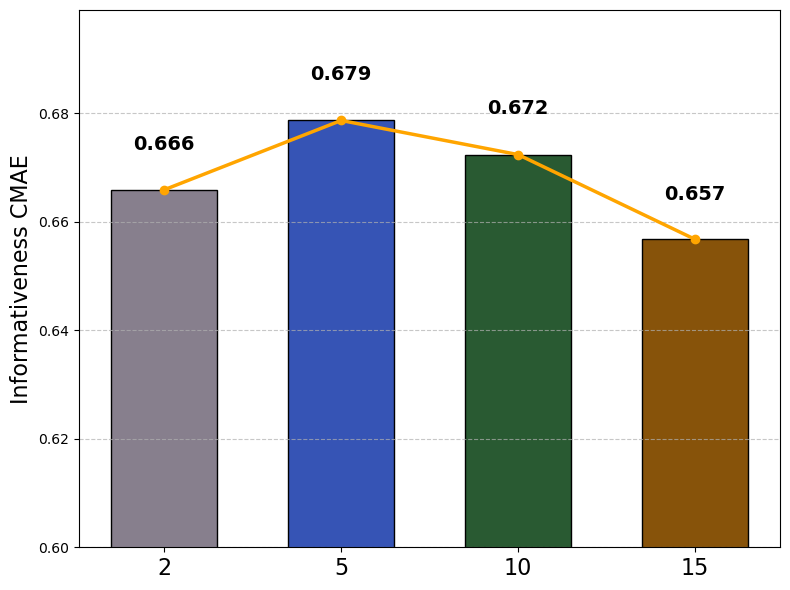

Plot saved as /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae/resourceless_performance_comparison_bar_line_cluster.png


In [13]:
def plot_category_comparison(avg_cfeddc_values_01, avg_cfeddc_values_02, avg_cfeddc_values_03, avg_cfeddc_values_04,
                             filename, ylim):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Bar data
    bar_heights = [avg_cfeddc_values_01, avg_cfeddc_values_02, avg_cfeddc_values_03, avg_cfeddc_values_04]
    bar_positions = np.arange(len(bar_heights))
    bar_labels = ['2', '5', '10', '15']

    # Bar plot
    bars = ax.bar(bar_positions, bar_heights,
                  color=["#877f8d", "#3654b5", "#295a32", "#87530a", ],
                  width=0.6, edgecolor='black')

    # Line connecting mean values
    ax.plot(bar_positions, bar_heights, marker='o', color='orange', linewidth=2.5, label='Mean Line')

    # Annotate each bar with its mean value
    for idx, bar in enumerate(bars):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, h * 1.01,
                f'{h:.3f}', ha='center', va='bottom',
                fontsize=14, fontweight='bold')

    ax.set_ylabel('Informativeness CMAE', fontsize=16)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(bar_labels, fontsize=16)
    ax.set_ylim(ylim, max(bar_heights) * 1.03)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # ax.legend()

    plt.tight_layout()
    out_path = os.path.join(output_dir, filename)
    plt.savefig(out_path)
    plt.show()
    print(f"Plot saved as {out_path}")


plot_category_comparison(
    avg_cfeddc_values_01=avg_resourceless_cfeddc_01,
    avg_cfeddc_values_02=avg_resourceless_cfeddc_02,
    avg_cfeddc_values_03=avg_resourceless_cfeddc_03,
    avg_cfeddc_values_04=avg_resourceless_cfeddc_04,
    filename='resourceless_performance_comparison_bar_line_cluster.png',
    ylim=0.60
)

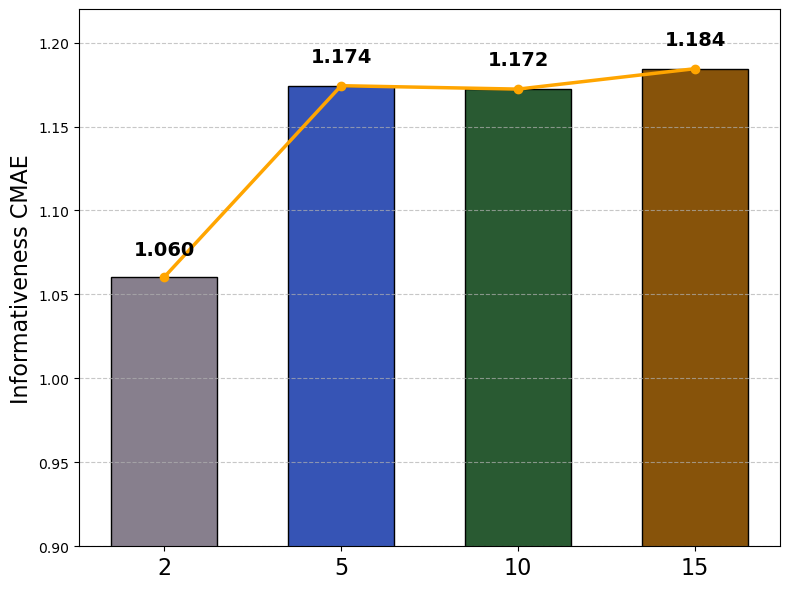

Plot saved as /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/all_mae/resourceful_performance_comparison_bar_line_cluster.png


In [16]:
def plot_category_comparison(avg_cfeddc_values_01, avg_cfeddc_values_02, avg_cfeddc_values_03, avg_cfeddc_values_04,
                             filename, ylim):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Bar data
    bar_heights = [avg_cfeddc_values_01, avg_cfeddc_values_02, avg_cfeddc_values_03, avg_cfeddc_values_04]
    bar_positions = np.arange(len(bar_heights))
    bar_labels = ['2', '5', '10', '15']

    # Bar plot
    bars = ax.bar(bar_positions, bar_heights,
                  color=["#877f8d", "#3654b5", "#295a32", "#87530a"],
                  width=0.6, edgecolor='black')

    # Line connecting mean values
    ax.plot(bar_positions, bar_heights, marker='o', color='orange', linewidth=2.5, label='Mean Line')

    # Annotate each bar with its mean value
    for idx, bar in enumerate(bars):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, h * 1.01,
                f'{h:.3f}', ha='center', va='bottom',
                fontsize=14, fontweight='bold')

    ax.set_ylabel('Informativeness CMAE', fontsize=16)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(bar_labels, fontsize=16)
    ax.set_ylim(ylim, max(bar_heights) * 1.03)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # ax.legend()

    plt.tight_layout()
    out_path = os.path.join(output_dir, filename)
    plt.savefig(out_path)
    plt.show()
    print(f"Plot saved as {out_path}")


plot_category_comparison(
    avg_cfeddc_values_01=avg_resourceful_cfeddc_01,
    avg_cfeddc_values_02=avg_resourceful_cfeddc_02,
    avg_cfeddc_values_03=avg_resourceful_cfeddc_03,
    avg_cfeddc_values_04=avg_resourceful_cfeddc_04,
    filename='resourceful_performance_comparison_bar_line_cluster.png',
    ylim=0.9
)

Convergence
1. Resourceful
2. Resourceless
3. Overalll


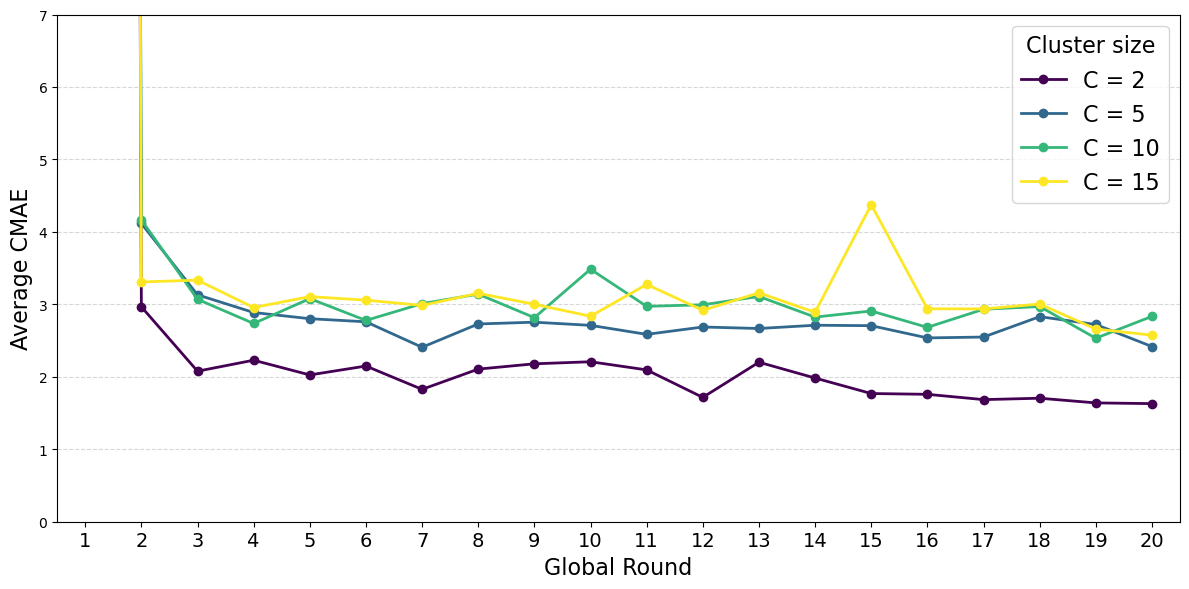

Saved plot to /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/all_mae/resourceful_cluster_comparison_KT_RL.png


In [22]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

# ─── 0. your list of full experiment directories ─────────────────────────────
# each of these must contain a subfolder "local_test" full of user_*.json files
exp_dirs = [
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C5/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C10/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C15/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
]

num_users = 535

# ─── 1. collect CMAE per‐folder ───────────────────────────────────────────────
cmae_lists = { d: [] for d in exp_dirs }
for d in exp_dirs:
    for uid in range(num_users):
        fp = os.path.join(d, "local_test", f"user_{uid}_test_round_results.json")
        if not os.path.exists(fp):
            continue
        with open(fp) as f:
            data = json.load(f)
        # only resourceful users
        rc = data.get("resource_category","").replace(" user","").lower()
        if rc != "resourceful":
            continue
        cmae = data.get("validation_results", {}).get("info_cmae", [])
        if cmae:
            cmae_lists[d].append(cmae)

# make sure we found something
for d, v in cmae_lists.items():
    if not v:
        raise RuntimeError(f"No CMAE for {d}")

# ─── 2. align by round ───────────────────────────────────────────────────────
common_rounds = min(max(len(u) for u in cmae_lists[d]) for d in exp_dirs)
plot_rounds   = min(common_rounds, 20)
rounds        = np.arange(1, plot_rounds+1)

by_round = {
    d: [ [] for _ in range(common_rounds) ]
    for d in exp_dirs
}
for d, users in cmae_lists.items():
    for u in users:
        for r in range(min(len(u), common_rounds)):
            by_round[d][r].append(u[r])

# ─── 3. plot mean±std ───────────────────────────────────────────────────────
plt.figure(figsize=(12,6))
cmap   = plt.get_cmap("viridis")
colors = [cmap(i/(len(exp_dirs)-1)) for i in range(len(exp_dirs))]

for i, d in enumerate(exp_dirs):
    means = [ np.mean(by_round[d][r]) for r in range(plot_rounds) ]
    stds  = [ np.std( by_round[d][r]) for r in range(plot_rounds) ]
    # extract C from the parent “rl1_C⋆” folder
    parent = os.path.basename(os.path.dirname(d))    # e.g. "CFedDC_KT_RL_rl1_C5"
    C = parent.split("_")[-1].lstrip("C")
    label = f"C = {C}"

    plt.plot( rounds, means, label=label, color=colors[i], linewidth=2, marker="o" )
    # plt.fill_between( rounds,
    #                  np.array(means)-np.array(stds),
    #                  np.array(means)+np.array(stds),
    #                  color=colors[i], alpha=0.2 )

plt.xticks(rounds, rounds, fontsize=14)
plt.xlim(0.5, plot_rounds+0.5)
plt.ylim(0, 7)
plt.xlabel("Global Round", fontsize=16)
plt.ylabel("Average CMAE", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Cluster size", title_fontsize=16, fontsize=16, loc="best")
plt.tight_layout()

out = os.path.join(os.path.dirname(exp_dirs[0]), "all_mae")
os.makedirs(out, exist_ok=True)
save_path = os.path.join(out, "resourceful_cluster_comparison_KT_RL.png")
plt.savefig(save_path)
plt.show()

print("Saved plot to", save_path)


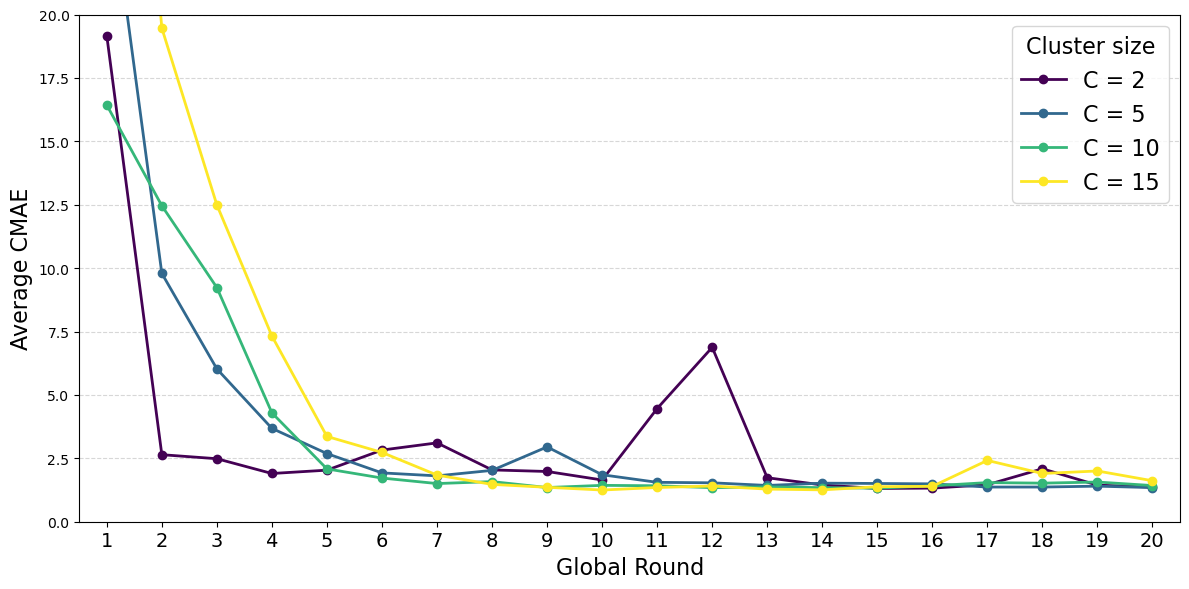

Saved plot to /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/all_mae/resourceless_cluster_comparison_KT_RL.png


In [21]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

# ─── 0. your list of full experiment directories ─────────────────────────────
# each of these must contain a subfolder "local_test" full of user_*.json files
exp_dirs = [
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C5/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C10/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C15/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
]

num_users = 535

# ─── 1. collect CMAE per‐folder ───────────────────────────────────────────────
cmae_lists = { d: [] for d in exp_dirs }
for d in exp_dirs:
    for uid in range(num_users):
        fp = os.path.join(d, "local_test", f"user_{uid}_test_round_results.json")
        if not os.path.exists(fp):
            continue
        with open(fp) as f:
            data = json.load(f)
        # only resourceful users
        rc = data.get("resource_category","").replace(" user","").lower()
        if rc != "resourceless":
            continue
        cmae = data.get("validation_results", {}).get("info_cmae", [])
        if cmae:
            cmae_lists[d].append(cmae)

# make sure we found something
for d, v in cmae_lists.items():
    if not v:
        raise RuntimeError(f"No CMAE for {d}")

# ─── 2. align by round ───────────────────────────────────────────────────────
common_rounds = min(max(len(u) for u in cmae_lists[d]) for d in exp_dirs)
plot_rounds   = min(common_rounds, 20)
rounds        = np.arange(1, plot_rounds+1)

by_round = {
    d: [ [] for _ in range(common_rounds) ]
    for d in exp_dirs
}
for d, users in cmae_lists.items():
    for u in users:
        for r in range(min(len(u), common_rounds)):
            by_round[d][r].append(u[r])

# ─── 3. plot mean±std ───────────────────────────────────────────────────────
plt.figure(figsize=(12,6))
cmap   = plt.get_cmap("viridis")
colors = [cmap(i/(len(exp_dirs)-1)) for i in range(len(exp_dirs))]

for i, d in enumerate(exp_dirs):
    means = [ np.mean(by_round[d][r]) for r in range(plot_rounds) ]
    stds  = [ np.std( by_round[d][r]) for r in range(plot_rounds) ]
    # extract C from the parent “rl1_C⋆” folder
    parent = os.path.basename(os.path.dirname(d))    # e.g. "CFedDC_KT_RL_rl1_C5"
    C = parent.split("_")[-1].lstrip("C")
    label = f"C = {C}"

    plt.plot( rounds, means, label=label, color=colors[i], linewidth=2, marker="o" )
    # plt.fill_between( rounds,
    #                  np.array(means)-np.array(stds),
    #                  np.array(means)+np.array(stds),
    #                  color=colors[i], alpha=0.2 )

plt.xticks(rounds, rounds, fontsize=14)
plt.xlim(0.5, plot_rounds+0.5)
plt.ylim(0, 20)
plt.xlabel("Global Round", fontsize=16)
plt.ylabel("Average CMAE", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Cluster size", title_fontsize=16, fontsize=16, loc="best")
plt.tight_layout()

out = os.path.join(os.path.dirname(exp_dirs[0]), "all_mae")
os.makedirs(out, exist_ok=True)
save_path = os.path.join(out, "resourceless_cluster_comparison_KT_RL.png")
plt.savefig(save_path)
plt.show()

print("Saved plot to", save_path)


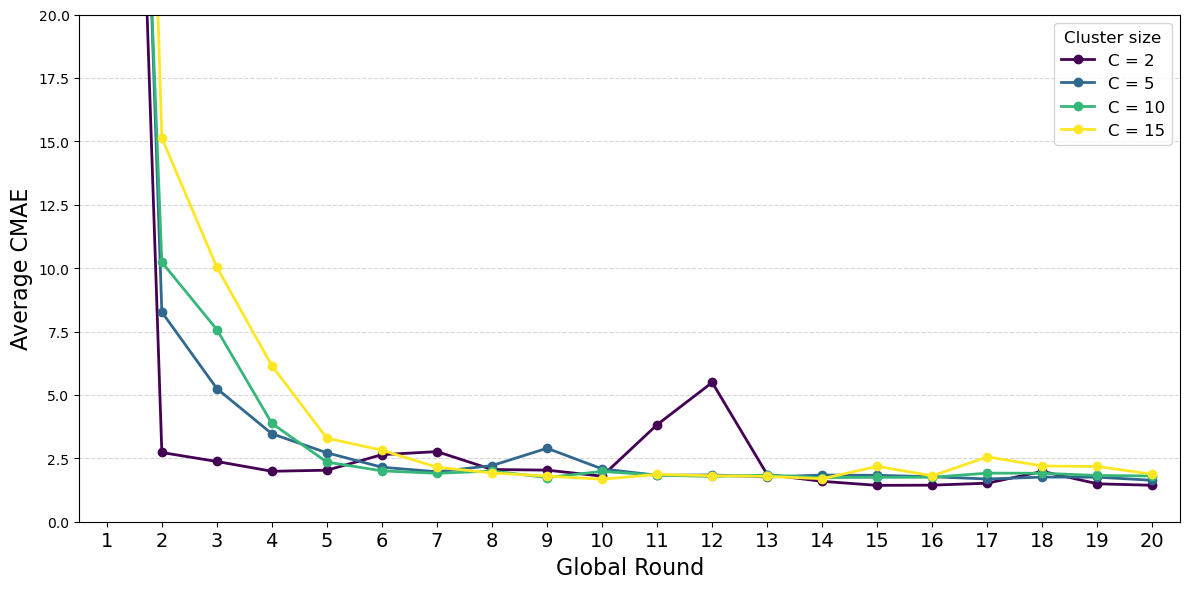

Saved plot to /proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/all_mae/alluser_cluster_comparison_KT_RL.png


In [23]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

# ─── 0. your list of full experiment directories ─────────────────────────────
# each of these must contain a subfolder "local_test" full of user_*.json files
exp_dirs = [
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C5/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C10/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
    "/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C15/CFedDC_KT_RL_lambda_min_0.3_lambda_max_0.7_kappa_1.0_delta_1.0",
]

num_users = 535

# ─── 1. collect CMAE per‐folder ───────────────────────────────────────────────
cmae_lists = { d: [] for d in exp_dirs }
for d in exp_dirs:
    for uid in range(num_users):
        fp = os.path.join(d, "local_test", f"user_{uid}_test_round_results.json")
        if not os.path.exists(fp):
            continue
        with open(fp) as f:
            data = json.load(f)
        # only resourceful users
        
        cmae = data.get("validation_results", {}).get("info_cmae", [])
        if cmae:
            cmae_lists[d].append(cmae)

# make sure we found something
for d, v in cmae_lists.items():
    if not v:
        raise RuntimeError(f"No CMAE for {d}")

# ─── 2. align by round ───────────────────────────────────────────────────────
common_rounds = min(max(len(u) for u in cmae_lists[d]) for d in exp_dirs)
plot_rounds   = min(common_rounds, 20)
rounds        = np.arange(1, plot_rounds+1)

by_round = {
    d: [ [] for _ in range(common_rounds) ]
    for d in exp_dirs
}
for d, users in cmae_lists.items():
    for u in users:
        for r in range(min(len(u), common_rounds)):
            by_round[d][r].append(u[r])

# ─── 3. plot mean±std ───────────────────────────────────────────────────────
plt.figure(figsize=(12,6))
cmap   = plt.get_cmap("viridis")
colors = [cmap(i/(len(exp_dirs)-1)) for i in range(len(exp_dirs))]

for i, d in enumerate(exp_dirs):
    means = [ np.mean(by_round[d][r]) for r in range(plot_rounds) ]
    stds  = [ np.std( by_round[d][r]) for r in range(plot_rounds) ]
    # extract C from the parent “rl1_C⋆” folder
    parent = os.path.basename(os.path.dirname(d))    # e.g. "CFedDC_KT_RL_rl1_C5"
    C = parent.split("_")[-1].lstrip("C")
    label = f"C = {C}"

    plt.plot( rounds, means, label=label, color=colors[i], linewidth=2, marker="o" )
    # plt.fill_between( rounds,
    #                  np.array(means)-np.array(stds),
    #                  np.array(means)+np.array(stds),
    #                  color=colors[i], alpha=0.2 )

plt.xticks(rounds, rounds, fontsize=14)
plt.xlim(0.5, plot_rounds+0.5)
plt.ylim(0, 20)
plt.xlabel("Global Round", fontsize=16)
plt.ylabel("Average CMAE", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Cluster size", title_fontsize=12, fontsize=12, loc="upper right")
plt.tight_layout()

out = os.path.join(os.path.dirname(exp_dirs[0]), "all_mae")
os.makedirs(out, exist_ok=True)
save_path = os.path.join(out, "alluser_cluster_comparison_KT_RL.png")
plt.savefig(save_path)
plt.show()

print("Saved plot to", save_path)
